## Linear Regression For Cars Exhibtion
by: Amer Saleh, Naif Sulaihem, Nasser Alshehri <br>


## Appendix
* <a href=#intro>introduction</a>
* <a href=#imports>Imports</a>
* <a href=#exploreAndClean>Explore data and clean</a>
* <a href=#analysis>analysis</a>
* <a href=#visuals>visualization</a>
* <a href=#models>models</a>




### <a name=#intro>introduction</a>


The history of transportation starts from the age of humans and has continued to change over some time. The first means of transportation was the human foot. The history of transport has undergone a radical change with the introduction of wheels. Existing means of transportation were continuously improved after that, for example, horse-drawn vehicles (carts or karts). Until the gas and fuel cars were invented

Cars are one of the most important necessities for every family, as they are the most popular means of transportation these days.

This project aims to analyze the used car market in the UK, compare car prices by type, engine, and car model, for example, which cars are most in demand. With the presence of more than one car company.

We will do a comprehensive analysis to find the best used cars to attract customers so that our showrooms are among the best and we can achieve the company's goal and vision for development in the used car sectors

### <a name='imports'>Imports</a>

In [1]:
# Importing libraries
# Data Analysis Libs
print("Importing.....", end="", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import math
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Machinelearning Libs
#from sklearn.linear_model import LinearRegressionegression

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print("[Done]")


Importing.....[Done]


In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#! pip install -U pandas-profiling
from pandas_profiling import ProfileReport


### Helper function

In [ ]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(15,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 2, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    """"plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")"""

In [ ]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y,preds)

In [ ]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)


In [ ]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)


def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

###  <a name=#exploreAndClean>Explore data and clean</a>


#### Upload Data Sets
here we upload our data set, we have two data set as shown below thats for Ford and Volkeswagen.

In [4]:
df_1 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/ford.csv')# upload data of Ford csv

In [5]:
df_2 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/vw.csv')# upload data of Volkeswagen csv

here we merge the two data sets using shuffle from sklearn

In [6]:
data = pd.concat([df_1,df_2]).reset_index(drop = True)

In [7]:
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
#this our profile data using pandas profiling
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

now we will explore our data to find null values and incorrect values:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33122 entries, 0 to 33121
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         33122 non-null  object 
 1   year          33122 non-null  int64  
 2   price         33122 non-null  int64  
 3   transmission  33122 non-null  object 
 4   mileage       33122 non-null  int64  
 5   fuelType      33122 non-null  object 
 6   tax           33122 non-null  int64  
 7   mpg           33122 non-null  float64
 8   engineSize    33122 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.3+ MB


describe the data

In [10]:
data.describe()

year         price        mileage           tax           mpg  \
count  33122.000000  33122.000000   33122.000000  33122.000000  33122.000000   
mean    2017.044683  14366.095797   22782.077592    113.064428     56.006241   
std        2.060700   6698.673164   20266.265383     62.688154     12.043983   
min     1996.000000    495.000000       1.000000      0.000000      0.300000   
25%     2016.000000   9750.000000    8207.000000     30.000000     48.700000   
50%     2017.000000  12880.000000   17506.000000    145.000000     56.500000   
75%     2019.000000  17798.000000   31398.500000    145.000000     62.800000   
max     2060.000000  69994.000000  212000.000000    580.000000    201.800000   

         engineSize  
count  33122.000000  
mean       1.465168  
std        0.463069  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.000000  
max        5.000000

In [11]:
data.isna().sum()#thiss ccode to find sum of null values for each columns

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [12]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [13]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [14]:
data.year.unique()#we look up with unique values for years

array([2016, 2019, 2017, 2020, 2015, 2018, 2014, 2013, 2011, 2007, 2009,
       2010, 2012, 2008, 2003, 2006, 2004, 2002, 2005, 2001, 2060, 1996,
       1998, 2000], dtype=int64)

In [15]:
data[data.year > 2020].head(5)#here we need to know if there incorrect value


model  year  price transmission  mileage fuelType  tax   mpg  \
14960   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
14960         1.4

In [16]:
data.shape

(33122, 9)

In [17]:
data.loc[data['year'] > 2020]#we look for the year more than 2020

model  year  price transmission  mileage fuelType  tax   mpg  \
14960   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
14960         1.4

In [18]:
data.drop(data[data['year'] > 2020].index, inplace = True)#we drop all value that more than 2020

In [19]:
data.shape

(33121, 9)

In [20]:
mask1 = data[data['engineSize'] == 0.0]#we put all the dropped values to the mask, so we can do some analysis with mask1

In [21]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
3181       Focus  2013   8999       Manual    34000   Petrol  150  47.1   
3220      Fiesta  2017   9899       Manual    10000   Petrol    0  65.7   
3356      Tiguan  2016  15300       Manual    38398   Diesel  145  53.3   
5108         Ka+  2018   9999       Manual    15000   Petrol  145  43.5   
5410      Fiesta  2017   9999       Manual    20000   Petrol    0  65.7   
...          ...   ...    ...          ...      ...      ...  ...   ...   
30649         KA  2018   9899       Manual     6000   Petrol  145  43.5   
30835       Puma  2019  23999       Manual     3000   Hybrid  150  50.4   
32160     Fiesta  2017   8702       Manual    15000   Petrol  150  65.7   
32615     Fiesta  2017   9275    Automatic    34000   Petrol    0  57.7   
33057   EcoSport  2017  11999       Manual    24000   Petrol  145  52.3   

       engineSize  
3181          0.0  
3220          0.0  
3356          0.0  
5108          0.0  
5410          0.0  
...           ...  
30649         0.0  
30835         0.0  
32160         0.0  
32615         0.0  
33057         0.0  

[66 rows x 9 columns]

In [22]:
data.drop(data[data['engineSize'] == 0.0].index, inplace = True)#drop all engineSize with 0.0

In [23]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
3181       Focus  2013   8999       Manual    34000   Petrol  150  47.1   
3220      Fiesta  2017   9899       Manual    10000   Petrol    0  65.7   
3356      Tiguan  2016  15300       Manual    38398   Diesel  145  53.3   
5108         Ka+  2018   9999       Manual    15000   Petrol  145  43.5   
5410      Fiesta  2017   9999       Manual    20000   Petrol    0  65.7   
...          ...   ...    ...          ...      ...      ...  ...   ...   
30649         KA  2018   9899       Manual     6000   Petrol  145  43.5   
30835       Puma  2019  23999       Manual     3000   Hybrid  150  50.4   
32160     Fiesta  2017   8702       Manual    15000   Petrol  150  65.7   
32615     Fiesta  2017   9275    Automatic    34000   Petrol    0  57.7   
33057   EcoSport  2017  11999       Manual    24000   Petrol  145  52.3   

       engineSize  
3181          0.0  
3220          0.0  
3356          0.0  
5108          0.0  
5410          0.0  
...           ...  
30649         0.0  
30835         0.0  
32160         0.0  
32615         0.0  
33057         0.0  

[66 rows x 9 columns]

In [24]:
data['engineSize']

0        1.2
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
33117    1.0
33118    1.0
33119    1.0
33120    1.0
33121    1.0
Name: engineSize, Length: 33055, dtype: float64

In [25]:
data.shape

(33055, 9)

In [26]:
data[data.mpg < 20]#we wanna look for incorrect data for mpg columns

model  year  price transmission  mileage fuelType  tax  mpg  \
6851   Golf SV  2019  17950       Manual      100   Petrol  145  0.3   

      engineSize  
6851         1.0

In [27]:
data.shape

(33055, 9)

In [28]:
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , :]

model  year  price transmission  mileage fuelType  tax   mpg  \
6851    Golf SV  2019  17950       Manual      100   Petrol  145   0.3   
7315    Golf SV  2019  15995       Manual     2506   Petrol  145  47.1   
15353   Golf SV  2019  16995       Manual     1353   Petrol  145  47.1   

       engineSize  
6851          1.0  
7315          1.0  
15353         1.0

In [29]:
#we replace 0.3 value with correct value 
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , 'mpg'] = 47.1

In [30]:
#drop tax columns
data = data.drop('tax' , axis=1)

In [31]:
data

model  year  price transmission  mileage fuelType   mpg  engineSize
0         Fiesta  2016   5990       Manual    40000   Petrol  54.3         1.2
1         Passat  2016   7793       Manual   114000   Diesel  67.3         2.0
2         Tiguan  2019  27490    Semi-Auto     3000   Petrol  30.4         2.0
3             Up  2016   6699       Manual    22500   Petrol  64.2         1.0
4         Fiesta  2019  14595       Manual     3902   Petrol  58.9         1.0
...          ...   ...    ...          ...      ...      ...   ...         ...
33117       Puma  2020  21795       Manual      680   Petrol  50.4         1.0
33118       Polo  2019  13690       Manual     6000   Petrol  48.7         1.0
33119     Fiesta  2017   9980       Manual    17562   Petrol  65.7         1.0
33120     Fiesta  2017  10698       Manual    13736   Petrol  62.8         1.0
33121   EcoSport  2019  16998       Manual     3378   Petrol  51.4         1.0

[33055 rows x 8 columns]

In [32]:
data.to_csv('usedCarsData.csv')

###   <a name=#analysis>analysis</a>

In [33]:
#counts frequency year
dataY = pd.value_counts(data['year'])
dataY

2019    7851
2017    7814
2018    5502
2016    4976
2015    2514
2014    1384
2020    1303
2013     922
2012     195
2011     151
2009     122
2010     108
2008      84
2007      52
2006      29
2005      24
2004       7
2003       5
2002       4
2001       4
2000       2
1998       1
1996       1
Name: year, dtype: int64

In [34]:
#counts frequency model
dataC = pd.value_counts(data['model'])
dataC

 Fiesta                   6537
 Golf                     4860
 Focus                    4577
 Polo                     3287
 Kuga                     2224
 Tiguan                   1762
 EcoSport                 1135
 Passat                    911
 Up                        882
 T-Roc                     731
 C-MAX                     543
 Ka+                       527
 Mondeo                    525
 Touareg                   363
 B-MAX                     355
 Touran                    352
 T-Cross                   300
 S-MAX                     296
 Golf SV                   268
 Sharan                    260
 Arteon                    248
 Grand C-MAX               247
 Scirocco                  242
 Galaxy                    228
 Edge                      208
 KA                        193
 Amarok                    111
 Caravelle                 101
 CC                         95
 Tiguan Allspace            91
 Beetle                     82
 Puma                       79
 Tourneo

In [35]:
#mean price of used cars
round(data.price.mean(),2)

14369.37

In [36]:
round(data.describe(), 2)

year     price    mileage       mpg  engineSize
count  33055.00  33055.00   33055.00  33055.00    33055.00
mean    2017.04  14369.37   22787.35     56.01        1.47
std        2.05   6701.99   20272.95     12.04        0.46
min     1996.00    495.00       1.00     20.80        1.00
25%     2016.00   9750.00    8202.50     48.70        1.00
50%     2017.00  12890.00   17502.00     56.50        1.50
75%     2019.00  17799.00   31412.00     62.80        2.00
max     2020.00  69994.00  212000.00    201.80        5.00

In [37]:
#we analyze Golf data
dataGolf = data.loc[(data.model == " Golf"), :]

In [38]:
dataGolf

model  year  price transmission  mileage fuelType   mpg  engineSize
15      Golf  2017  18999    Automatic    25000   Diesel  57.7         2.0
22      Golf  2016   9998       Manual    21230   Diesel  74.3         1.6
24      Golf  2019  21950    Semi-Auto     4533   Petrol  43.5         1.5
29      Golf  2015  11000       Manual    40170   Petrol  53.3         1.4
30      Golf  2015   9500       Manual    22708   Diesel  62.8         2.0
...      ...   ...    ...          ...      ...      ...   ...         ...
33107   Golf  2018  15189       Manual    36320   Diesel  61.4         1.6
33108   Golf  2017  10698       Manual    36002   Diesel  61.4         1.6
33109   Golf  2014   9899       Manual    37175   Diesel  68.9         2.0
33111   Golf  2017  13995       Manual    28000   Petrol  54.3         1.4
33113   Golf  2020  24999       Manual     5000   Petrol  47.9         1.5

[4860 rows x 8 columns]

In [39]:
sumAll= dataGolf["price"]# sum of all Golf car price
sumAll.sum()

81119540

In [40]:
yearGolf = pd.value_counts(dataGolf["year"])
yearGolf

2019    1545
2016     963
2017     874
2015     430
2018     378
2020     257
2014     218
2013     114
2012      18
2011      16
2010      14
2009      11
2008       7
2005       4
2006       3
2007       3
2004       2
2000       1
2003       1
2002       1
Name: year, dtype: int64

In [41]:
#count transmission of Golf
transGolf = pd.value_counts(dataGolf["transmission"])
transGolf

Manual       2934
Semi-Auto    1336
Automatic     590
Name: transmission, dtype: int64

In [42]:
fuelGolf = pd.value_counts(dataGolf["fuelType"])
fuelGolf

Petrol    2704
Diesel    2041
Hybrid      87
Other       28
Name: fuelType, dtype: int64

In [43]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail()

year
2016    35051.0
2017    26653.0
2018    20204.0
2019     6932.0
2020     2055.0
Name: mileage, dtype: float64

In [44]:
# try to find the mean of prices by years
meanPerYearGolf = dataGolf.groupby('year')['price'].agg(np.mean)
round(meanPerYearGolf)

year
2000     1999.0
2002     1275.0
2003    12450.0
2004     1418.0
2005     2546.0
2006     2894.0
2007     3591.0
2008     3894.0
2009     5009.0
2010     4642.0
2011     7435.0
2012     8147.0
2013     8385.0
2014    10443.0
2015    12286.0
2016    14023.0
2017    15602.0
2018    17573.0
2019    20667.0
2020    25016.0
Name: price, dtype: float64

In [45]:
dataFiesta = data.loc[(data.model == " Fiesta") , :]
dataFiesta

model  year  price transmission  mileage fuelType   mpg  engineSize
0       Fiesta  2016   5990       Manual    40000   Petrol  54.3         1.2
4       Fiesta  2019  14595       Manual     3902   Petrol  58.9         1.0
7       Fiesta  2019  14698       Manual     7872   Petrol  58.9         1.0
13      Fiesta  2017  10300       Manual    23076   Petrol  62.8         1.0
17      Fiesta  2018  13300       Manual     5687   Petrol  62.8         1.0
...        ...   ...    ...          ...      ...      ...   ...         ...
33099   Fiesta  2016   7830       Manual    21478   Petrol  54.3         1.2
33114   Fiesta  2018  15250       Manual    14108   Petrol  62.8         1.0
33115   Fiesta  2018  12000       Manual     9452   Petrol  65.7         1.0
33119   Fiesta  2017   9980       Manual    17562   Petrol  65.7         1.0
33120   Fiesta  2017  10698       Manual    13736   Petrol  62.8         1.0

[6537 rows x 8 columns]

In [46]:
dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)

year
2015    31133.301811
2016    25813.323910
2017    20020.853674
2018    16428.221366
2019     7502.579694
2020     1002.000000
Name: mileage, dtype: float64

In [47]:
dataGolf.groupby('year')['price'].agg(np.mean).tail()

year
2016    14023.249221
2017    15602.494279
2018    17572.923280
2019    20666.740453
2020    25016.116732
Name: price, dtype: float64

In [48]:
dataGolf.corr()

year     price   mileage       mpg  engineSize
year        1.000000  0.700723 -0.771765 -0.248059   -0.098524
price       0.700723  1.000000 -0.669186 -0.356026    0.358566
mileage    -0.771765 -0.669186  1.000000  0.335082    0.119921
mpg        -0.248059 -0.356026  0.335082  1.000000   -0.124036
engineSize -0.098524  0.358566  0.119921 -0.124036    1.000000

### <a name=#visuals>visualization</a>

In [49]:
dataY.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Cars');

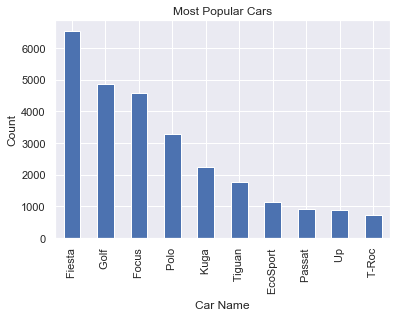

In [50]:
dataC.head(10).plot(kind='bar')
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.title('Most Popular Cars');

In [51]:
sns.catplot(x="fuelType", y="price", kind="box", data=dataGolf);

<Figure size 1440x1440 with 0 Axes>

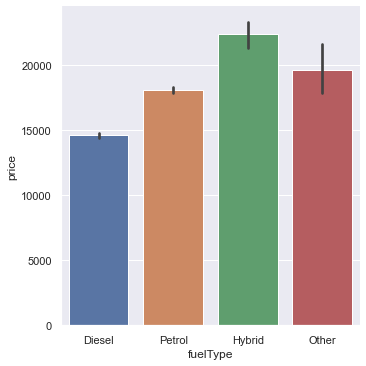

In [52]:
plt.figure(figsize=(20,20),facecolor='w')
sns.catplot(x="fuelType", y="price",kind="bar", data=dataGolf);

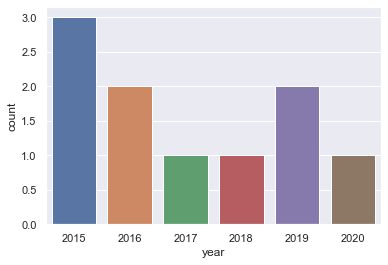

In [53]:
sns.countplot(x="year", data=dataGolf.head(10));

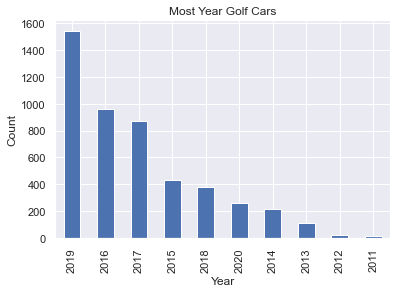

In [54]:
yearGolf.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Golf Cars');

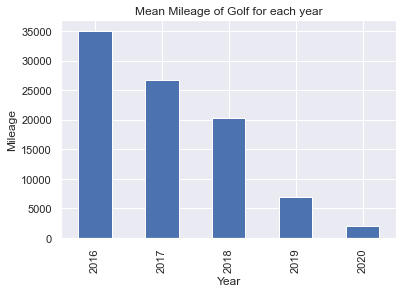

In [55]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail(5).plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean Mileage of Golf for each year');

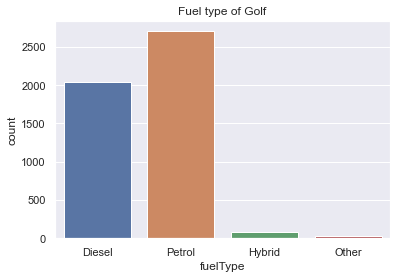

In [56]:
sns.countplot(dataGolf["fuelType"]);
plt.title("Fuel type of Golf");

<AxesSubplot:xlabel='year', ylabel='price'>

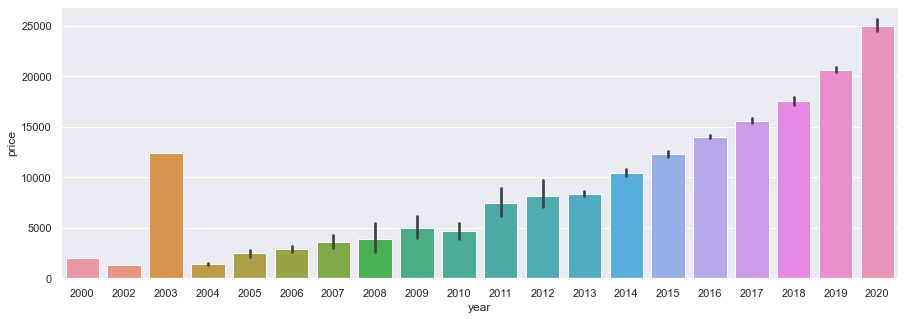

In [57]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = dataGolf["year"], y = dataGolf["price"])

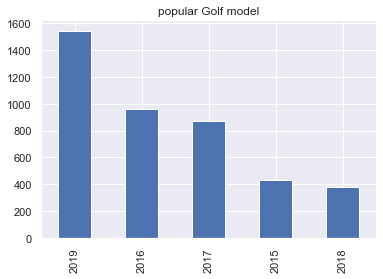

In [58]:
yearGolf.head(5).plot(kind='bar')
plt.title('popular Golf model');

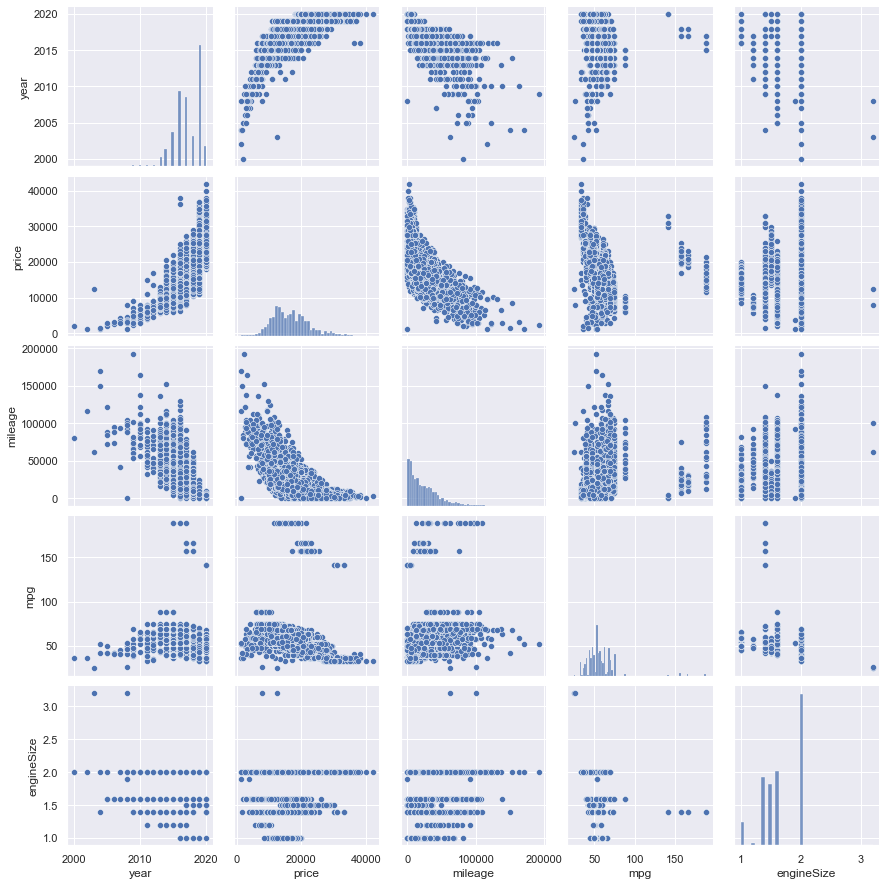

In [59]:
sns.pairplot(dataGolf)

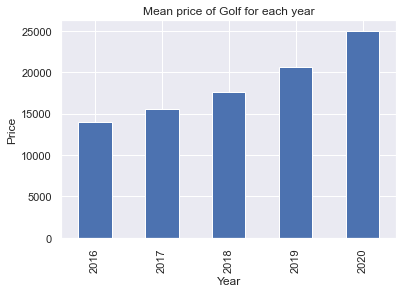

In [60]:
round(dataGolf.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Golf for each year');

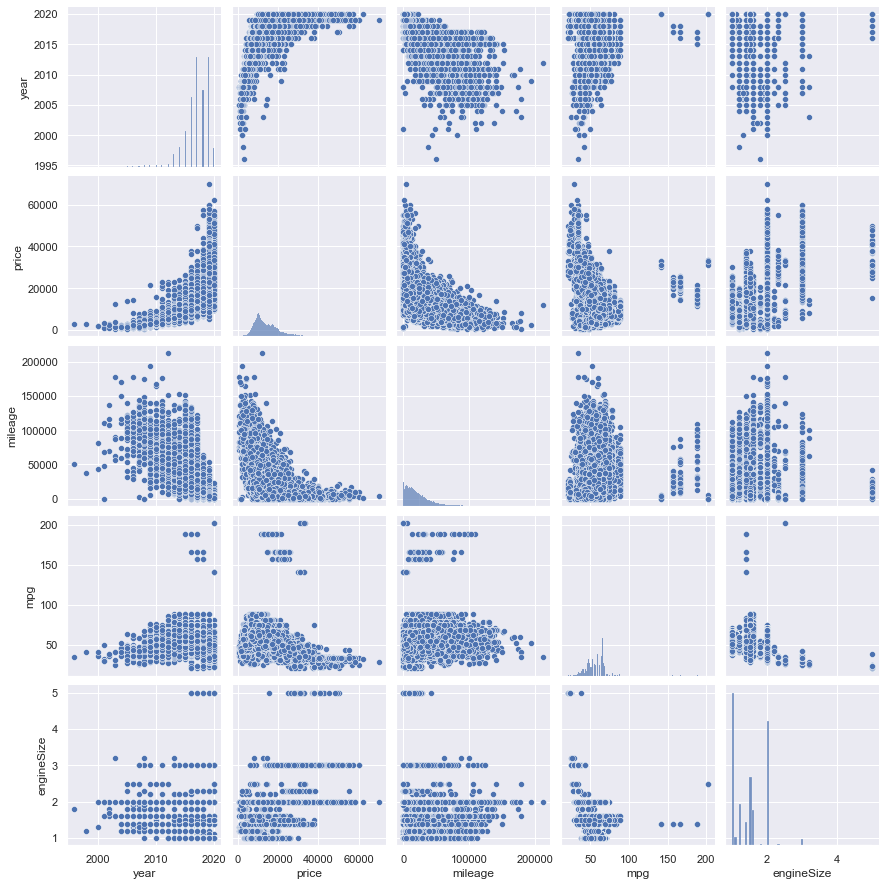

In [61]:
sns.pairplot(data=data);

what is the correlation between price and year, price and mileage ?

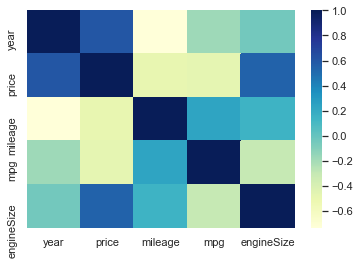

In [62]:
sns.heatmap(data.corr(),cmap="YlGnBu");#there is no correlation between price and mileage for customers, as we can see there is a correlation between price and year

In [63]:
data.corr()

year     price   mileage       mpg  engineSize
year        1.000000  0.604235 -0.738596 -0.180184   -0.041344
price       0.604235  1.000000 -0.492703 -0.468425    0.546644
mileage    -0.738596 -0.492703  1.000000  0.235761    0.149467
mpg        -0.180184 -0.468425  0.235761  1.000000   -0.303380
engineSize -0.041344  0.546644  0.149467 -0.303380    1.000000

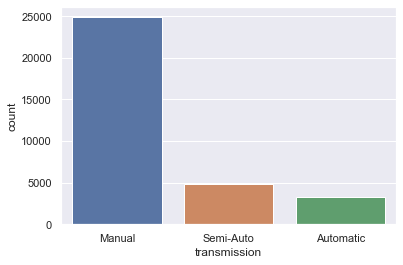

In [64]:
sns.countplot(data["transmission"]);

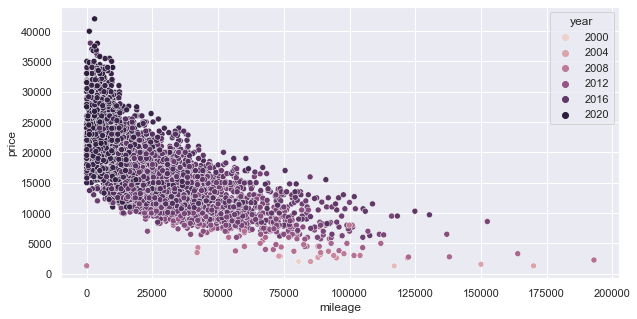

In [65]:
plt.figure(figsize=(10,5),facecolor='w')
sns.scatterplot(dataGolf["mileage"], dataGolf["price"], hue = dataGolf["year"]);


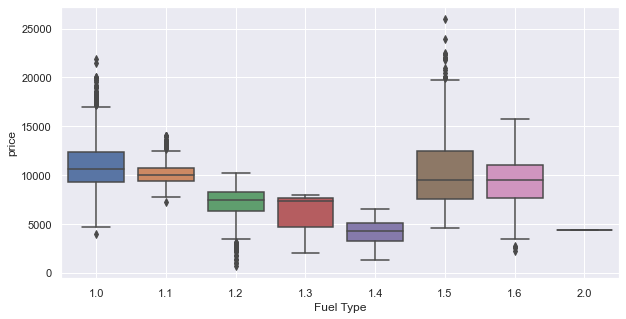

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(x='engineSize',y='price',data=dataFiesta)
plt.xlabel("Fuel Type")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

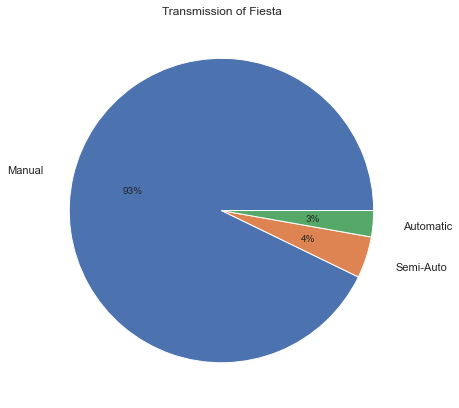

In [67]:
plt.figure(figsize=(7,7))
plt.pie(pd.value_counts(dataFiesta["transmission"]), labels=['Manual', 'Semi-Auto', 'Automatic'], autopct='%1.0f%%', labeldistance=1.2)
plt.title("Transmission of Fiesta");

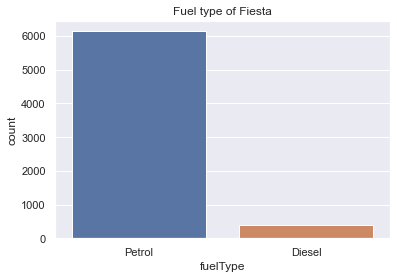

In [68]:
sns.countplot(dataFiesta["fuelType"]);
plt.title("Fuel type of Fiesta");

In [69]:
dataFiesta.groupby('year')['price'].agg(np.mean).tail()

year
2016     8766.722026
2017     9717.969968
2018    11270.377753
2019    14371.770742
2020    16688.235294
Name: price, dtype: float64

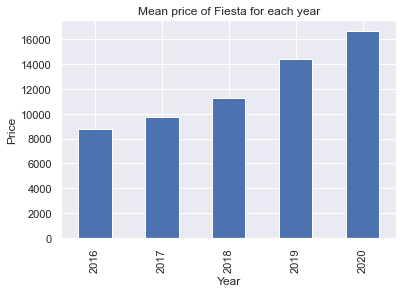

In [70]:
round(dataFiesta.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Fiesta for each year');

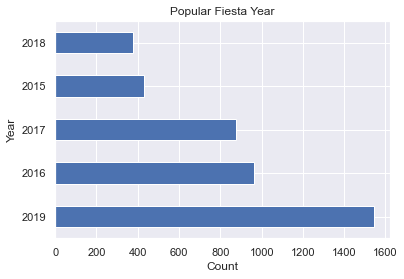

In [71]:
yearGolf.head(5).plot(kind='barh')
plt.title('Popular Fiesta Year')
plt.xlabel("Count")
plt.ylabel("Year");

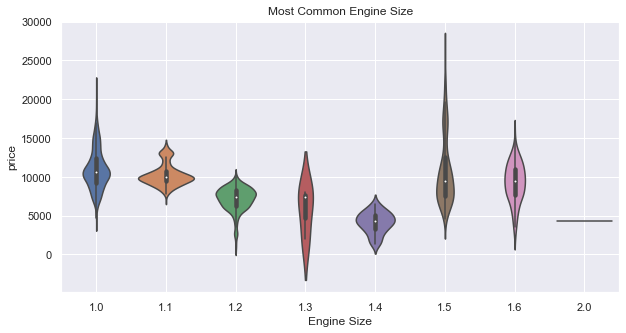

In [72]:
plt.figure(figsize=(10,5))
sns.violinplot(x='engineSize',y='price',data=dataFiesta)
plt.title("Most Common Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

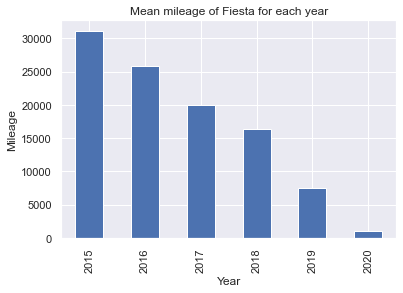

In [73]:
round(dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean mileage of Fiesta for each year');

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

In [74]:
data

model  year  price transmission  mileage fuelType   mpg  engineSize
0         Fiesta  2016   5990       Manual    40000   Petrol  54.3         1.2
1         Passat  2016   7793       Manual   114000   Diesel  67.3         2.0
2         Tiguan  2019  27490    Semi-Auto     3000   Petrol  30.4         2.0
3             Up  2016   6699       Manual    22500   Petrol  64.2         1.0
4         Fiesta  2019  14595       Manual     3902   Petrol  58.9         1.0
...          ...   ...    ...          ...      ...      ...   ...         ...
33117       Puma  2020  21795       Manual      680   Petrol  50.4         1.0
33118       Polo  2019  13690       Manual     6000   Petrol  48.7         1.0
33119     Fiesta  2017   9980       Manual    17562   Petrol  65.7         1.0
33120     Fiesta  2017  10698       Manual    13736   Petrol  62.8         1.0
33121   EcoSport  2019  16998       Manual     3378   Petrol  51.4         1.0

[33055 rows x 8 columns]

### <a name=#models>models</a>

#### Baseline Model

In [97]:
X = data.drop("price", axis=1)

In [98]:
numeric_df = X.select_dtypes(include=np.number)
X = numeric_df
y = data[["price"]]

In [99]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.20, random_state=10 )
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=10 )

In [100]:
#Training
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.7517457361090352

In [101]:
#Validation
X_val_numeric = X_val.select_dtypes(include=np.number)
lm.score(X_val_numeric,y_val)

0.7360830292902666

In [102]:
#testing
lm.score(X_test,y_test)

0.7441618635430312

             price
21738  3037.225400
24361    42.258110
31018  1702.879509
22045   247.853972
8222   -115.968702
...            ...
11291  3121.392815
5103   -764.446885
2634   1587.821776
17581  1952.583889
645    1153.092308

[6611 rows x 1 columns]


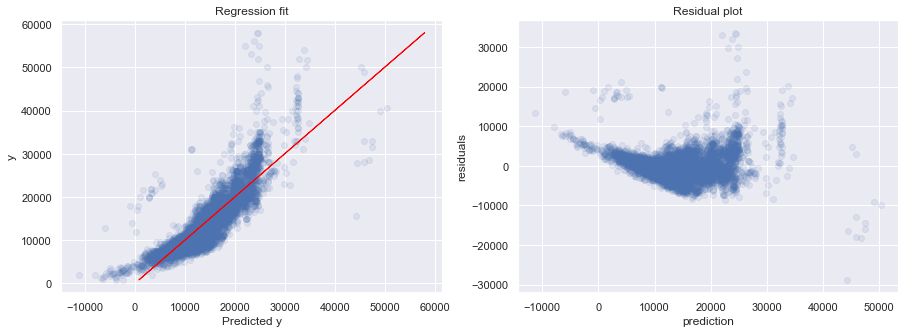

In [103]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

In [104]:
lm.predict(X_val_numeric)

array([[15352.28195024],
       [10067.76196122],
       [ 9079.97338292],
       ...,
       [18772.18155671],
       [10789.97189903],
       [20728.15371452]])

## Exprement One
get dummies

In [105]:
df_dummies = pd.get_dummies(data, drop_first=True)
df_dummies

year  price  mileage   mpg  engineSize  model_ Arteon  model_ B-MAX  \
0      2016   5990    40000  54.3         1.2              0             0   
1      2016   7793   114000  67.3         2.0              0             0   
2      2019  27490     3000  30.4         2.0              0             0   
3      2016   6699    22500  64.2         1.0              0             0   
4      2019  14595     3902  58.9         1.0              0             0   
...     ...    ...      ...   ...         ...            ...           ...   
33117  2020  21795      680  50.4         1.0              0             0   
33118  2019  13690     6000  48.7         1.0              0             0   
33119  2017   9980    17562  65.7         1.0              0             0   
33120  2017  10698    13736  62.8         1.0              0             0   
33121  2019  16998     3378  51.4         1.0              0             0   

       model_ Beetle  model_ C-MAX  model_ CC  ...  model_ Tourneo Connect  \
0                  0             0          0  ...                       0   
1                  0             0          0  ...                       0   
2                  0             0          0  ...                       0   
3                  0             0          0  ...                       0   
4                  0             0          0  ...                       0   
...              ...           ...        ...  ...                     ...   
33117              0             0          0  ...                       0   
33118              0             0          0  ...                       0   
33119              0             0          0  ...                       0   
33120              0             0          0  ...                       0   
33121              0             0          0  ...                       0   

       model_ Tourneo Custom  model_ Transit Tourneo  model_ Up  \
0                          0                       0          0   
1                          0                       0          0   
2                          0                       0          0   
3                          0                       0          1   
4                          0                       0          0   
...                      ...                     ...        ...   
33117                      0                       0          0   
33118                      0                       0          0   
33119                      0                       0          0   
33120                      0                       0          0   
33121                      0                       0          0   

       transmission_Manual  transmission_Semi-Auto  fuelType_Electric  \
0                        1                       0                  0   
1                        1                       0                  0   
2                        0                       1                  0   
3                        1                       0                  0   
4                        1                       0                  0   
...                    ...                     ...                ...   
33117                    1                       0                  0   
33118                    1                       0                  0   
33119                    1                       0                  0   
33120                    1                       0                  0   
33121                    1                       0                  0   

       fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                    0               0                1  
1                    0               0                0  
2                    0               0                1  
3                    0               0                1  
4                    0               0                1  
...                ...             ...              ...  
33117                0               0       

In [106]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [107]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.2, random_state= 50)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25, random_state= 10)

In [108]:
type(df_dummies)

pandas.core.frame.DataFrame

In [109]:
lr_dumm = LinearRegression()
lr_dumm.fit(X_train,y_train)


predicted_lr_dumm = lr_dumm.predict(X_test)
print("dummy")
print('train Score: ',lr_dumm.score(X_train,y_train))
print('validation Score: ',lr_dumm.score(X_val,y_val))
print('test Score: ',lr_dumm.score(X_test,y_test))

dummy
train Score:  0.882564551510149
validation Score:  0.8831303542878086
test Score:  0.8782554404324817


             price
28124  5069.344222
20611   -14.990098
5196  -2018.832297
20664 -3356.047760
6108  -2317.790449
...            ...
23384 -1348.953541
947      86.704825
6496   -489.060672
33082  1139.709300
9219    638.331016

[6611 rows x 1 columns]


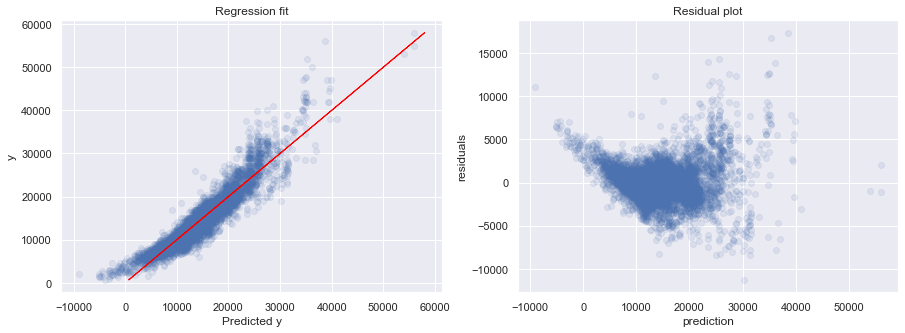

In [110]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

## Experment Two
experment with the log y

In [111]:
# Expr3 (log expr)
y_log = np.log(y)
y_log

price
3327   9.393495
5387   9.822820
11970  9.825526
21343  9.658162
22324  9.994242
...         ...
19438  9.416541
8572   9.277906
32086  9.546741
22675  9.546741
14022  7.481556

[26444 rows x 1 columns]

In [112]:
X,X_test,y_log,y_test_log=train_test_split(X,y_log,test_size=0.2, random_state= 50)
X_train,X_val,y_log_train,y_log_val=train_test_split(X,y_log,test_size=0.25, random_state= 10)

In [113]:
lr_log = LinearRegression()
lr_log.fit(X_train,y_log_train)


predicted_lr_log = lr_log.predict(X_test)
print("Cox Exper")
print('train Score: ',lr_log.score(X_train,y_log_train))
print('validation Score: ',lr_log.score(X_val,y_log_val))
print('test Score: ',lr_log.score(X_test,y_test_log))
#print("Mean absolute Error",MAE(np.exp(y_test_cox),np.exp(predicted_lr_log)))

Cox Exper
train Score:  0.9242769548195153
validation Score:  0.9221103808522642
test Score:  0.9253509271114315


              price
5049  -1.115663e-01
23046 -9.199752e-12
5898  -1.144120e-01
6020   3.174716e-01
6015  -6.128921e-03
...             ...
4137   1.310128e-01
9459  -9.732558e-02
12030 -1.980265e-02
14415  1.035312e-01
11039  1.581924e-01

[5289 rows x 1 columns]


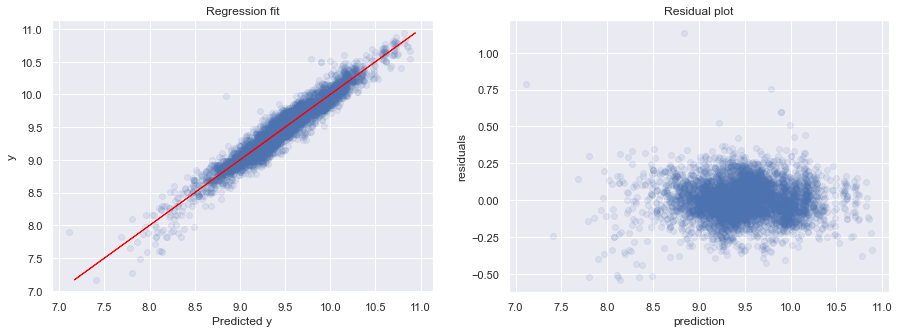

In [115]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test_log)

## Experment Three 
this experment with cox box


In [119]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [120]:
from sklearn.preprocessing import power_transform
y_cox = power_transform(y, method='box-cox')

In [121]:
X,X_test,y_cox,y_test_cox=train_test_split(X,y_cox,test_size=0.2, random_state= 50)
X_train,X_val,y_train,y_val=train_test_split(X,y_cox,test_size=0.25, random_state= 10)

In [122]:
lr_cox = LinearRegression()
lr_cox.fit(X_train,y_train)


predicted_lr_cox = lr_cox.predict(X_test)
print("Cox Exper")
print('train Score: ',lr_cox.score(X_train,y_train))
print('validation Score: ',lr_cox.score(X_val,y_val))
print('test Score: ',lr_cox.score(X_test,y_test_cox))
print("Mean absolute Error",MAE(np.exp(y_test_cox),np.exp(predicted_lr_cox)))

Cox Exper
train Score:  0.9257033218526676
validation Score:  0.9238631730077921
test Score:  0.9240631969251487
Mean absolute Error 0.3628303779596037


[[ 0.44332382]
 [-0.03871459]
 [-0.41414139]
 ...
 [-0.06861292]
 [ 0.06194447]
 [ 0.11501878]]


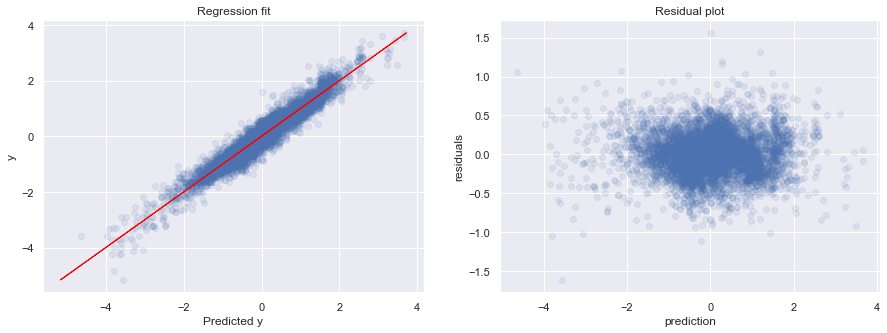

In [123]:
sns.set(style='darkgrid')
diagnostic_plot(X_test,y_test_cox)

## Experment Four
this experment with Standard Scaler

In [124]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [125]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
y_cox = power_transform(y, method='box-cox')

In [126]:
X_std,X_std_test,y_cox,y_cox_test=train_test_split(X_std,y_cox,test_size=0.2, random_state= 50)
X_std_train,X_std_val,y_cox_train,y_cox_val=train_test_split(X_std,y_cox,test_size=0.25, random_state= 10)

In [127]:
lr_std = LinearRegression()
lr_std.fit(X_std_train,y_cox_train)


predicted_lr_std = lr_std.predict(X_std_test)

print('train Score: ',lr_std.score(X_std_train,y_cox_train))
print('validation Score: ',lr_std.score(X_std_val,y_cox_val))
print('test Score: ',lr_std.score(X_std_test,y_cox_test))
#print("Mean absolute Error",MAE(np.exp(y_test),np.exp(predicted_lr_dumm)))

train Score:  0.925703321852395
validation Score:  -2034106614658215.8
test Score:  -690134035485098.9


             price
28124  5069.344222
20611   -14.990098
5196  -2018.832297
20664 -3356.047760
6108  -2317.790449
...            ...
23384 -1348.953541
947      86.704825
6496   -489.060672
33082  1139.709300
9219    638.331016

[6611 rows x 1 columns]


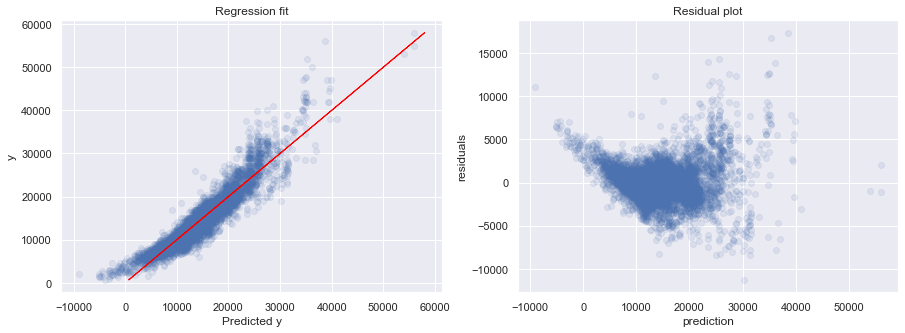

In [128]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

## Experment Five
Lasso

In [129]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [130]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [131]:
from sklearn.preprocessing import StandardScaler
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [132]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
X_va = std.transform(X_val.values)
#y_tr = std.transform(y_train.values)
#y_te = std.transform(y_test.values)
#y_va = std.transform(y_val.values)

In [133]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [134]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

In [135]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, y_train)

In [136]:
print('best estimator: ',lasso_grid.best_estimator_)
print('best Score: ',lasso_grid.best_score_)

best estimator:  Lasso(alpha=0.03)
best Score:  0.8811949012954825


             price
24069 -2235.749615
1544   6370.009990
7967   2023.433412
5459   -161.194755
7284   1004.610942
...            ...
15023   661.243932
9616   -138.420949
18891  -427.120660
24389  -592.305262
9796    179.337154

[19833 rows x 1 columns]


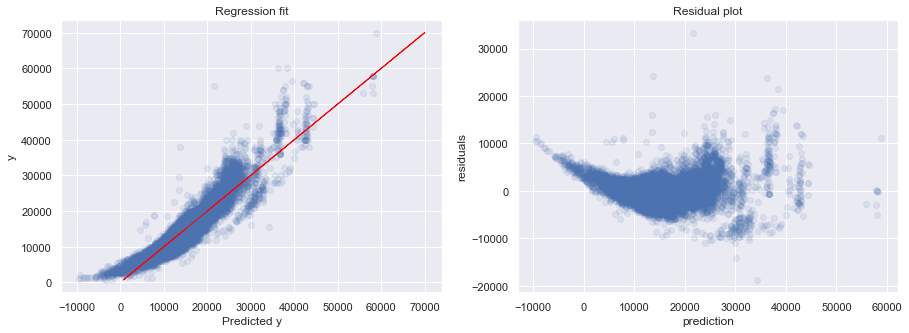

In [137]:
sns.set(style='darkgrid')
diagnostic_plot(X_tr, y_train)

In [138]:
# print('train Score: ',lasso_model.score(X_tr,y_train))
# print('validation Score: ',lasso_model.score(X_va,y_val))
# print('test Score: ',lasso_model.score(X_te,y_test))

In [139]:
#list(zip(X_train.columns, lasso_model.coef_))

In [140]:
# fit model with target as  price index
df1_model = sm.OLS(y, X, data = df_dummies)

results = df1_model.fit()

# summarize our model
results.summary()
# This Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.786e+04
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                        0.00
Time:                        15:04:25   Log-Likelihood:                     -3.0883e+05
No. Observations:               33055   AIC:                                  6.178e+05
Df Residuals:                   32996   BIC:                                  6.183e+05
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year                            11.4321      0.179     63.709      0.000      11.080      11.784
mileage                         -0.1549      0.001   -184.426      0.000      -0.157      -0.153
mpg                            -72.3501      2.180    -33.182      0.000     -76.624     -68.077
engineSize                    3998.3919     76.440     52.307      0.000    3848.566    4148.217
model_ Arteon                 -318.0097    322.396     -0.986      0.324    -949.917     313.898
model_ B-MAX                  -1.12e+04    316.520    -35.392      0.000   -1.18e+04   -1.06e+04
model_ Beetle                -9128.4765    411.148    -22.202      0.000   -9934.342   -8322.611
model_ C-MAX                 -9279.2027    303.125    -30.612      0.000   -9873.339   -8685.066
model_ CC                    -7961.8684    392.814    -20.269      0.000   -8731.797   -7191.940
model_ Caddy                 -7199.5953   1160.675     -6.203      0.000   -9474.559   -4924.631
model_ Caddy Life            -7393.8091   1014.371     -7.289      0.000   -9382.012   -5405.606
model_ Caddy Maxi            -5771.0581   1410.454     -4.092      0.000   -8535.599   -3006.517
model_ Caddy Maxi Life       -6299.5006    450.551    -13.982      0.000   -7182.597   -5416.404
model_ California             3.006e+04    763.085     39.392      0.000    2.86e+04    3.16e+04
model_ Caravelle              1.402e+04    385.491     36.376      0.000    1.33e+04    1.48e+04
model_ EcoSport              -8057.9949    295.100    -27.306      0.000   -8636.402   -7479.588
model_ Edge                  -1282.0886    330.739     -3.876      0.000   -1930.349    -633.829
model_ Eos                   -8468.7251   1080.189     -7.840      0.000   -1.06e+04   -6351.517
model_ Escort                -1.607e+04   2778.348     -5.783      0.000   -2.15e+04   -1.06e+04
model_ Fiesta                -8855.8503    287.716    -30.780      0.000   -9419.784   -8291.917
model_ Focus                 -6600.7580    282.881    -23.334      0.000   -7155.215   -6046.301
model_ Fox                   -1.004e+04   1411.695     -7.109      0.000   -1.28e+04   -7269.445
model_ Fusion                -1.235e+04    744.962    -16.575      0.000   -1.38e+04   -1.09e+04
model_ Galaxy                -3501.5642    326.563    -10.722      0.000   -4141.640   -2861.488
model_ Golf                  -5094.5880    277.712    -18.345      0.000   -5638.913   -4550.263
model_ Golf SV               -6826.8664    324.145    -21.061      0.000   -7462.202   -6191.531
model_ Grand C-MAX           -8501.8921    329.621    -25.793      0.000   -9147.961   -7855.823
model_ Grand Tourneo Connect -5368.8261    454.470    -11.813      0.000  